In [1]:
import pandas as pd
import plotly.graph_objects as go
filename = "https://raw.githubusercontent.com/spencerlawrence36/basic/master/places.csv"
df = pd.read_csv(filename, encoding='utf-8')
df = df.head(100)
df.columns
fig=go.Figure(go.Scattermapbox(
               lat=[df.loc[0, 'lat']],
               lon=[df.loc[0, 'lng']],
               mode='markers',
               marker=dict(size=10, color='red')
            ))
        

fig.update_layout(mapbox=dict(#accesstoken=mapbox_access_token,
                              bearing=0,
                              center=dict(lat=33.49,
                              lon=-112.05),
                              pitch=0,
                              zoom=8.5,
                              style='carto-positron'));
# the last update can be performed simply as:
#fig.update_mapboxes (the above unpacked dict); for beginners it's more clear the initial update 
frames = [go.Frame(data= [go.Scattermapbox(
                                       lat=df.loc[:k+1, 'lat'], 
                                       lon=df.loc[:k+1, 'lng'])], 
                   name=f'frame{k}'      
                  )for k  in  range(len(df))]    
fig.update(frames=frames);
sliders = [dict(steps= [dict(method= 'animate',
                           args= [[ f'frame{k}'],
                                  dict(mode= 'immediate',
                                  frame= dict(duration=100, redraw= True ),
                                              transition=dict( duration= 0))
                                 ],
                            label=None
                             ) for k in range(len(df))], 
                transition= dict(duration= 0 ),
                x=0,#slider starting position  
                y=0, 
                currentvalue=dict(font=dict(size=12), 
                                  prefix='Point: ', 
                                  visible=True, 
                                  xanchor= 'center'),  
                len=1.0)
           ]
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False,
                                y=0,
                                x=1.05,
                                xanchor='right',
                                yanchor='top',
                                pad=dict(t=0, r=10),
                                buttons=[dict(label='Play',
                                              method='update',
                                              args=[None, 
                                                    dict(frame=dict(duration=100, 
                                                                    redraw=True),
                                                         transition=dict(duration=0),
                                                         fromcurrent=True,
                                                         mode='immediate'
                                                        )
                                                   ]
                                             )
                                        ]
                               )
                          ],
                  sliders=sliders);
fig.show()

In [1]:
import pandas as pd
from datetime import timedelta

discharges = pd.read_csv('./data/discharges.csv',
                         header=0,
                         delimiter=',',
                         index_col=0,
                         names=[
                             'date', 'longitude', 'latitude', 'polarity',
                             'magnitude', 'current'
                         ],
                         parse_dates=['date'])
outages = pd.read_csv('./data/outages.csv',
                      header=0,
                      delimiter=',',
                      index_col=0,
                      names=[
                          'date', 'year', 'time', 'cause', 'outages_number',
                          'r_inf', 'r_sup'
                      ],
                      parse_dates=['date'])
towers = pd.read_csv('./data/towers.csv',
                     header=0,
                     delimiter=',',
                     names=['longitude', 'latitude'])
discharges_all_outages = pd.DataFrame(columns=discharges.columns)


def Discharges_before_outage_by_time(outage_date, time_range, min_before=5):
    
    datetime_f = outage_date - timedelta(minutes=min_before)
    print('fecha final',datetime_f)
    datetime_i = datetime_f - timedelta(minutes=time_range)
    print('fecha inicial',datetime_i)
        
    discharges_copy = discharges.copy()
    discharges_before_outage_by_time = discharges_copy[
        (discharges_copy['date'] > datetime_i)
        & (discharges_copy['date'] < datetime_f)]
    return discharges_before_outage_by_time


In [2]:
outages.loc['59', "date"]

Timestamp('2018-08-29 21:58:00')

In [3]:
outage_date = outages.loc['59', "date"]

In [6]:
outage_date

Timestamp('2018-08-29 21:58:00')

In [9]:
Discharges_before_outage_by_time(outage_date, 1, min_before=20-i)

NameError: name 'i' is not defined

In [48]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

def get_frames(minutes_animation, outage_date):
    frames = []
    for i in range(minutes_animation+1):
#         print(20-i)
#         print(f'\tfalla ocurrio {outage_date}')
#         print('-'*10)
        discharges_before = Discharges_before_outage_by_time(outage_date, 1, min_before=20-i)
#         print(len(discharges_before))
#         print('****'*10)

#         print(discharges_before.shape)
        frames.append(go.Frame(data= [go.Scattermapbox(
                                               lat=discharges_before.latitude, 
                                               lon=discharges_before.longitude, 
                               marker=go.scattermapbox.Marker(
                    size=7,
                    color=discharges_before['magnitude'],
                    colorscale=None,
                    opacity=0.7,
                    showscale=False,
                    colorbar=dict(title='lll')),
            customdata=pd.concat([discharges_before.date.dt.strftime('%H:%M:%S'), discharges_before.magnitude,discharges_before.polarity,discharges_before.current], axis=1).values,
            hovertemplate='<b>Time: %{customdata[0]}</b><br><br>z2:%{lat:.3f}<br>Magnitude: %{customdata[1]:.1f}</b><br>Polarity: %{customdata[3]:.0f}'),
                                     ],
                              name=f'frame{i}'))
    return frames

frames = get_frames(20, outage_date=outages.loc['59', "date"])

fecha final 2018-08-29 21:38:00
fecha inicial 2018-08-29 21:37:00
fecha final 2018-08-29 21:39:00
fecha inicial 2018-08-29 21:38:00
fecha final 2018-08-29 21:40:00
fecha inicial 2018-08-29 21:39:00
fecha final 2018-08-29 21:41:00
fecha inicial 2018-08-29 21:40:00
fecha final 2018-08-29 21:42:00
fecha inicial 2018-08-29 21:41:00
fecha final 2018-08-29 21:43:00
fecha inicial 2018-08-29 21:42:00
fecha final 2018-08-29 21:44:00
fecha inicial 2018-08-29 21:43:00
fecha final 2018-08-29 21:45:00
fecha inicial 2018-08-29 21:44:00
fecha final 2018-08-29 21:46:00
fecha inicial 2018-08-29 21:45:00
fecha final 2018-08-29 21:47:00
fecha inicial 2018-08-29 21:46:00
fecha final 2018-08-29 21:48:00
fecha inicial 2018-08-29 21:47:00
fecha final 2018-08-29 21:49:00
fecha inicial 2018-08-29 21:48:00
fecha final 2018-08-29 21:50:00
fecha inicial 2018-08-29 21:49:00
fecha final 2018-08-29 21:51:00
fecha inicial 2018-08-29 21:50:00
fecha final 2018-08-29 21:52:00
fecha inicial 2018-08-29 21:51:00
fecha fina

fecha final 2018-10-08 23:42:00
fecha inicial 2018-10-08 23:41:00
fecha final 2018-10-08 23:43:00
fecha inicial 2018-10-08 23:42:00
fecha final 2018-10-08 23:44:00
fecha inicial 2018-10-08 23:43:00
fecha final 2018-10-08 23:45:00
fecha inicial 2018-10-08 23:44:00
fecha final 2018-10-08 23:46:00
fecha inicial 2018-10-08 23:45:00
fecha final 2018-10-08 23:47:00
fecha inicial 2018-10-08 23:46:00
fecha final 2018-10-08 23:48:00
fecha inicial 2018-10-08 23:47:00
fecha final 2018-10-08 23:49:00
fecha inicial 2018-10-08 23:48:00
fecha final 2018-10-08 23:50:00
fecha inicial 2018-10-08 23:49:00
fecha final 2018-10-08 23:51:00
fecha inicial 2018-10-08 23:50:00
fecha final 2018-10-08 23:52:00
fecha inicial 2018-10-08 23:51:00
fecha final 2018-10-08 23:53:00
fecha inicial 2018-10-08 23:52:00
fecha final 2018-10-08 23:54:00
fecha inicial 2018-10-08 23:53:00
fecha final 2018-10-08 23:55:00
fecha inicial 2018-10-08 23:54:00
fecha final 2018-10-08 23:56:00
fecha inicial 2018-10-08 23:55:00
fecha fina

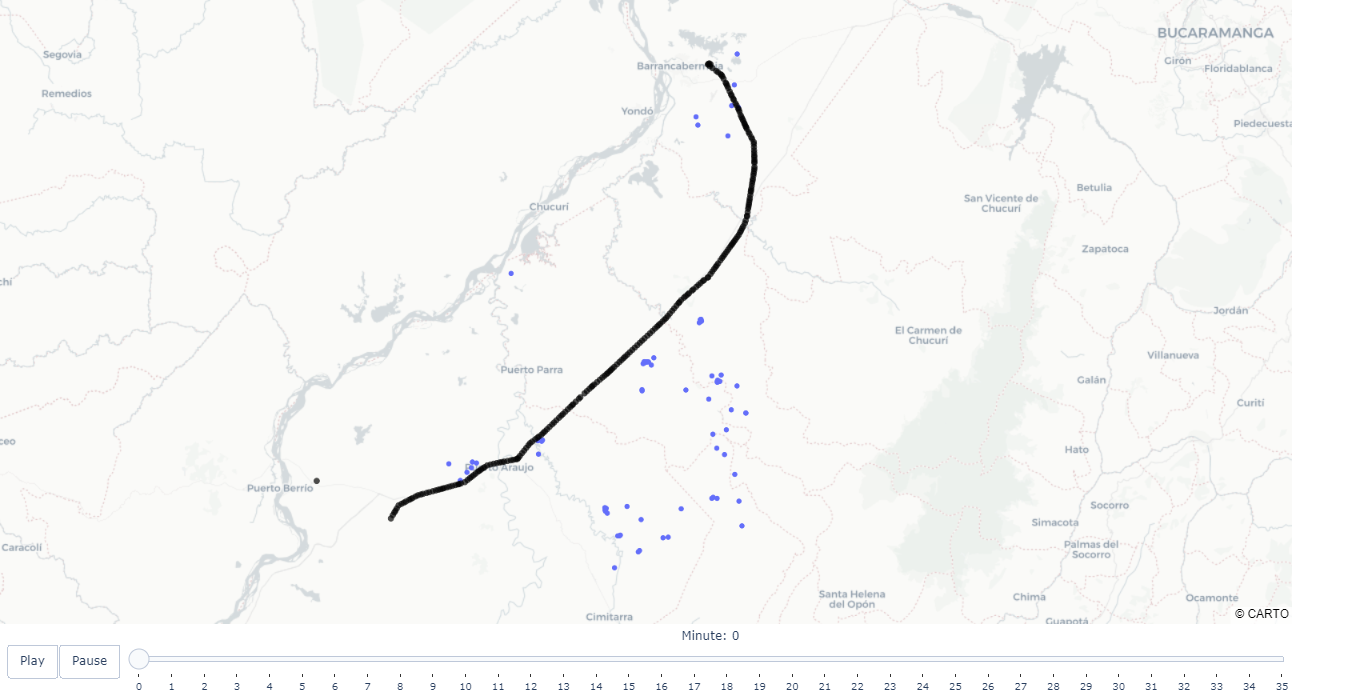

In [49]:
import plotly
plotly.__version__
import pandas as pd
import plotly.graph_objects as go

minutes_animation = 35

frames = get_frames(minutes_animation, outage_date=outages.loc['60', "date"])
df = Discharges_before_outage_by_time(outage_date, 1, min_before=minutes_animation)

fig = go.Figure(
    go.Scattermapbox(
        lat=df.latitude,
        lon=df.longitude,
        mode="markers",
    )
)

fig.add_trace(
    go.Scattermapbox(
        lat=towers.latitude,
        lon=towers.longitude,
        mode="markers",  # markers+lines
        marker=go.scattermapbox.Marker(size=7, color="black", opacity=0.7),
        name="Towers",
    )
)
fig.update(layout_showlegend=False)
fig.update_layout(
    margin={"t": 0.2, "l": 0, "b": 0},
    height=700,
    mapbox=dict(  # accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(lat=6.73, lon=-73.9),
        pitch=0,
        zoom=9,
        style="carto-positron",
    ),
)

fig.update(frames=frames)
sliders = [
    dict(
        steps=[
            dict(
                method="animate",
                args=[
                    [f"frame{k}"],
                    dict(
                        mode="immediate",
                        frame=dict(duration=100, redraw=True),
                        transition=dict(duration=0),
                        label="C",
                    ),
                ],label='{:d}'.format(k)
            )
            for k in range(len(frames))
        ],
        transition=dict(duration=0),
        x=0.1,  # slider starting position
        y=0,
        len=0.9,
        ticklen=3,
        pad= {"b": 10, "t": 0},
        font={'size':10},
        currentvalue=dict(
            font=dict(size=12), prefix="Minute: ", visible=True, xanchor="center"
        ),
    )
]

fig["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": True},
                                "fromcurrent": True, "transition": {"duration": 0,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": True},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 20},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

fig["layout"]["sliders"] = sliders
fig.show()

In [16]:
!conda activate dashenv

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 102469 to 102652
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       184 non-null    datetime64[ns]
 1   longitude  184 non-null    float64       
 2   latitude   184 non-null    float64       
 3   polarity   184 non-null    int64         
 4   magnitude  184 non-null    float64       
 5   current    184 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 10.1+ KB


In [179]:
df.resample('min',on='date').sum()

,longitude,latitude,polarity,magnitude,current
date,,,,,
2018-08-29 21:57:00,-13636.3199,1204.9735,-148,2564.0,-2233.4


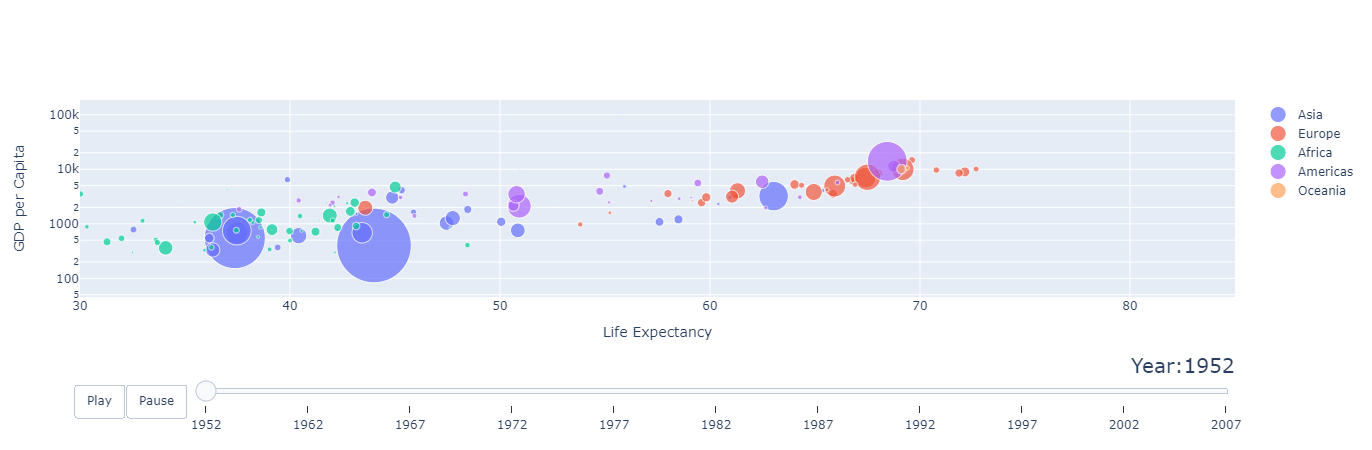

In [26]:
import plotly.graph_objects as go

import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
dataset = pd.read_csv(url)

years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002",
         "2007"]

# make list of continents
continents = []
for continent in dataset["continent"]:
    if continent not in continents:
        continents.append(continent)
# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# fill in most of layout
fig_dict["layout"]["xaxis"] = {"range": [30, 85], "title": "Life Expectancy"}
fig_dict["layout"]["yaxis"] = {"title": "GDP per Capita", "type": "log"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 0,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# make data
year = 1952
for continent in continents:
    dataset_by_year = dataset[dataset["year"] == year]
    dataset_by_year_and_cont = dataset_by_year[
        dataset_by_year["continent"] == continent]

    data_dict = {
        "x": list(dataset_by_year_and_cont["lifeExp"]),
        "y": list(dataset_by_year_and_cont["gdpPercap"]),
        "mode": "markers",
        "text": list(dataset_by_year_and_cont["country"]),
        "marker": {
            "sizemode": "area",
            "sizeref": 200000,
            "size": list(dataset_by_year_and_cont["pop"])
        },
        "name": continent
    }
    fig_dict["data"].append(data_dict)

# make frames
for year in years:
    frame = {"data": [], "name": str(year)}
    for continent in continents:
        dataset_by_year = dataset[dataset["year"] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[
            dataset_by_year["continent"] == continent]

        data_dict = {
            "x": list(dataset_by_year_and_cont["lifeExp"]),
            "y": list(dataset_by_year_and_cont["gdpPercap"]),
            "mode": "markers",
            "text": list(dataset_by_year_and_cont["country"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 200000,
                "size": list(dataset_by_year_and_cont["pop"])
            },
            "name": continent
        }
        frame["data"].append(data_dict)

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [year],
        {"frame": {"duration": 300, "redraw": True},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": year,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show()

In [2]:
!pip install nbformat